# Initialize

In [1]:
visible_devices = [1]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if len(visible_devices) == 0:
        visible_devices = int(visible_devices) # type: ignore
    elif len(visible_devices) == 1:
        if len(visible_devices[0]) == 0: # type: ignore
            visible_devices = int(visible_devices[0])
        else:
            visible_devices = [int(i) for i in visible_devices[0]] # type: ignore
    else:
        visible_devices = [int(i) for i in visible_devices]
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../')
import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "../results/"
if not os.path.exists(results_dir):
    print("WARNING: Results directory does not exist")
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-04 07:04:49.677664: Importing os...
2024-04-04 07:04:49.677915: Importing sys...
Visible devices: [1]
2024-04-04 07:04:49.678650: Importing timer from timeit...
2024-04-04 07:04:49.678823: Setting env variables for tf import (only device [1] will be available)...
2024-04-04 07:04:49.679139: Importing numpy...
2024-04-04 07:04:49.823293: Importing matplotlib...
2024-04-04 07:04:50.142749: Importing h5py...
2024-04-04 07:04:50.161749: Importing importlib.util...
2024-04-04 07:04:50.161848: Importing json...
2024-04-04 07:04:50.161912: Importing pandas...
2024-04-04 07:04:50.433026: Importing random...
2024-04-04 07:04:50.433138: Importing scipy utils...
2024-04-04 07:04:50.678371: Importing subprocess...
2024-04-04 07:04:50.678467: Importing tensorflow...
Tensorflow version: 2.12.0
2024-04-04 07:04:52.099381: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-04-04 07:04:52.418579: Importing timeit...
2024-04-04 07:04:52.418669: Importing tqdm...
2024

# Fixed $n=10000$

## Null hypotheses

### Model definition

In [2]:
seed = 0
ncomp = 10
ndims = 100
niter = 10_000
batch_size_test = 10_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)


In [3]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


In [5]:
TwoSampleTestInputs.dist_1_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [6]:
TwoSampleTestInputs.dist_2_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [7]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 1000,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 1000,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [8]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,is_symb_1,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample
0,10000,10000,10000,10000000,float64,0,True,False,None,True,True,100,0,True,100,0,float64,100,100000000,False


In [9]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: (ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: (ns/ndims)**(3/2)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: ns/np.sqrt(ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 1000, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 1000, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 10000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 100,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 100,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 100,
   'nsamples': 100000000,
   'small_sample': False},
  'max_vectorize': 200,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/100D_10K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key': 'metric_list'

### Compute/save/load null hypotheses

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

#obj.Results[-1].result_value

Loading fn from ../results/100D_10K/null_hypothesis/FN.json
Loading fpd from ../results/100D_10K/null_hypothesis/FPD.json
Loading kpd from ../results/100D_10K/null_hypothesis/KPD.json
Loading ks from ../results/100D_10K/null_hypothesis/KS.json
Loading sks from ../results/100D_10K/null_hypothesis/SKS.json
Loading swd from ../results/100D_10K/null_hypothesis/SWD.json


In [11]:
cl_list = [0.68, 0.95, 0.99]

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.9190262949972976], [0.95, [9500, 500], 1.163020209902126], [0.99, [9900, 100], 1.3179537521716542]]
ThresholdS for metric fpd: [[0.68, [6800, 3199], 2.125009796879998], [0.95, [9500, 500], 3.1122284633764514], [0.99, [9900, 100], 3.8631867185793047]]
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.04725440173825035], [0.95, [9500, 500], 0.10140783177847723], [0.99, [9900, 100], 0.1462337129392033]]
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9076427718802609], [0.95, [9500, 500], 1.0902174352707914], [0.99, [9900, 100], 1.212193802414268]]
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.903803078077085], [0.95, [9500, 500], 1.0769097338066926], [0.99, [9900, 100], 1.1813566708429235]]
ThresholdS for metric swd: [[0.68, [6800, 3199], 0.3215222675610459], [0.95, [9500, 500], 0.4092750536886394], [0.99, [9900, 100], 0.4617281529746639]]


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f7869ff6200>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 10000, 'ba...",200,$\overline{\|\cdot\|}_{F}$,../results/100D_10K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.9190262949972976], [0...."
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f7869ff6170>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$d_{\mathrm{FPD}}$,../results/100D_10K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 2.125009796879998], [0.9..."
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f7869ff75b0>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",2,$d_{\mathrm{KPD}}$,../results/100D_10K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], 0.04725440173825035], [0..."
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f7869ff7640>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\overline{D}$,../results/100D_10K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9076427718802609], [0...."
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f7869ff76d0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\widetilde{D}$,../results/100D_10K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.903803078077085], [0.9..."
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f7869ff7760>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\widetilde{W}$,../results/100D_10K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.3215222675610459], [0...."
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f7869ff77f0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$t_{\mu}$,../results/100D_10K/null_hypothesis/LR.json,[]


### Plots of null-hypotheses

mu = 0.8432326548410783 +/- 0.0003337879816711959
sigma = 0.18269865398278004 +/- 0.0013402342789156528


/tmp/ipykernel_6092/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_6092/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_6092/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_6092/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


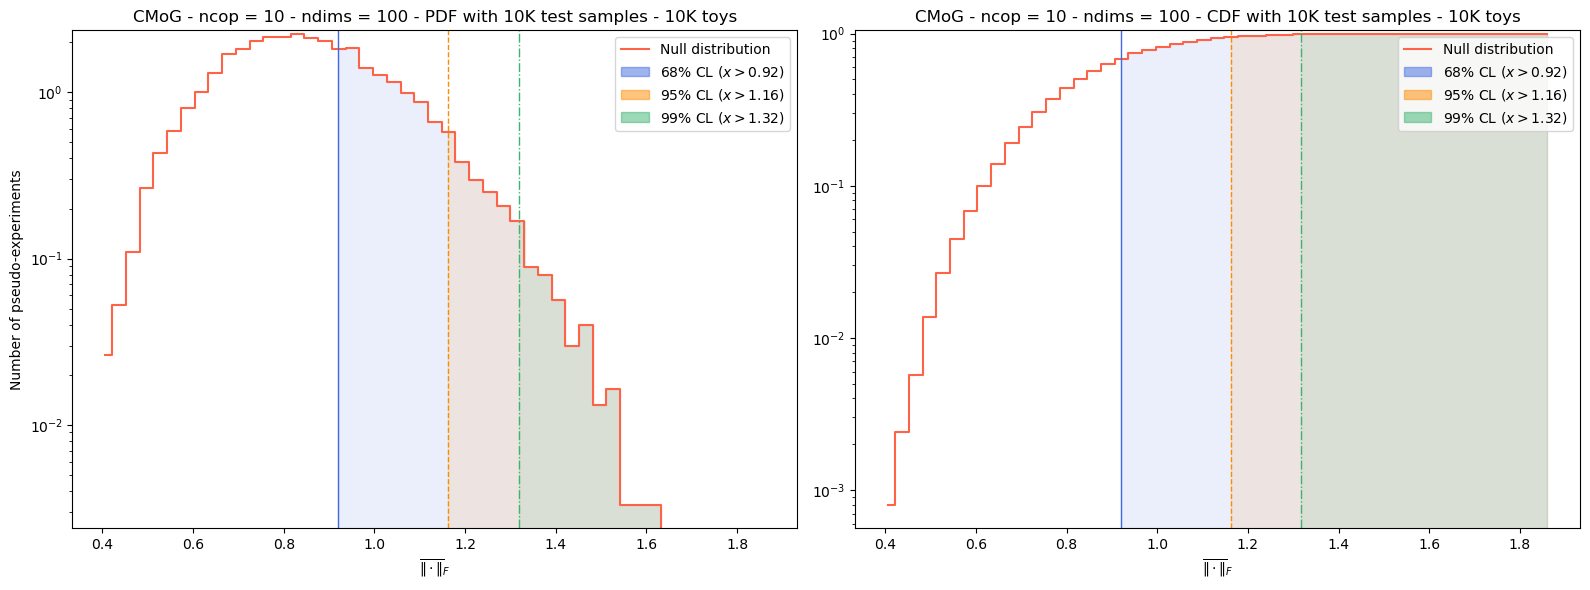

Time elapsed: 1.1770838908851147 seconds.
mu = 1.9131907561908106 +/- 0.004016520629899808
sigma = 0.6337602567138308 +/- 0.005627859249268887


/tmp/ipykernel_6092/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_6092/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_6092/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_6092/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


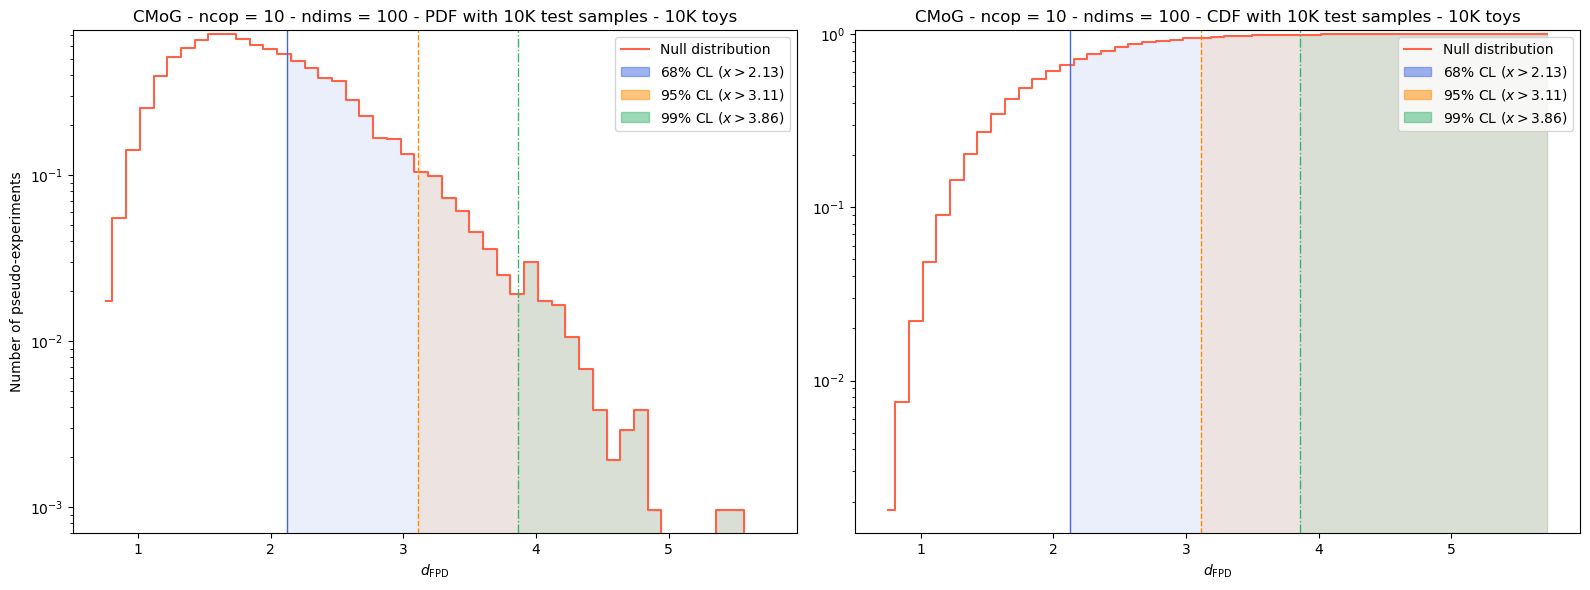

Time elapsed: 1.0094808731228113 seconds.
mu = 0.03605530506471508 +/- 1.2343630147842755e-05
sigma = 0.03513350274003826 +/- 0.00034228181192723996


/tmp/ipykernel_6092/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_6092/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_6092/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_6092/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


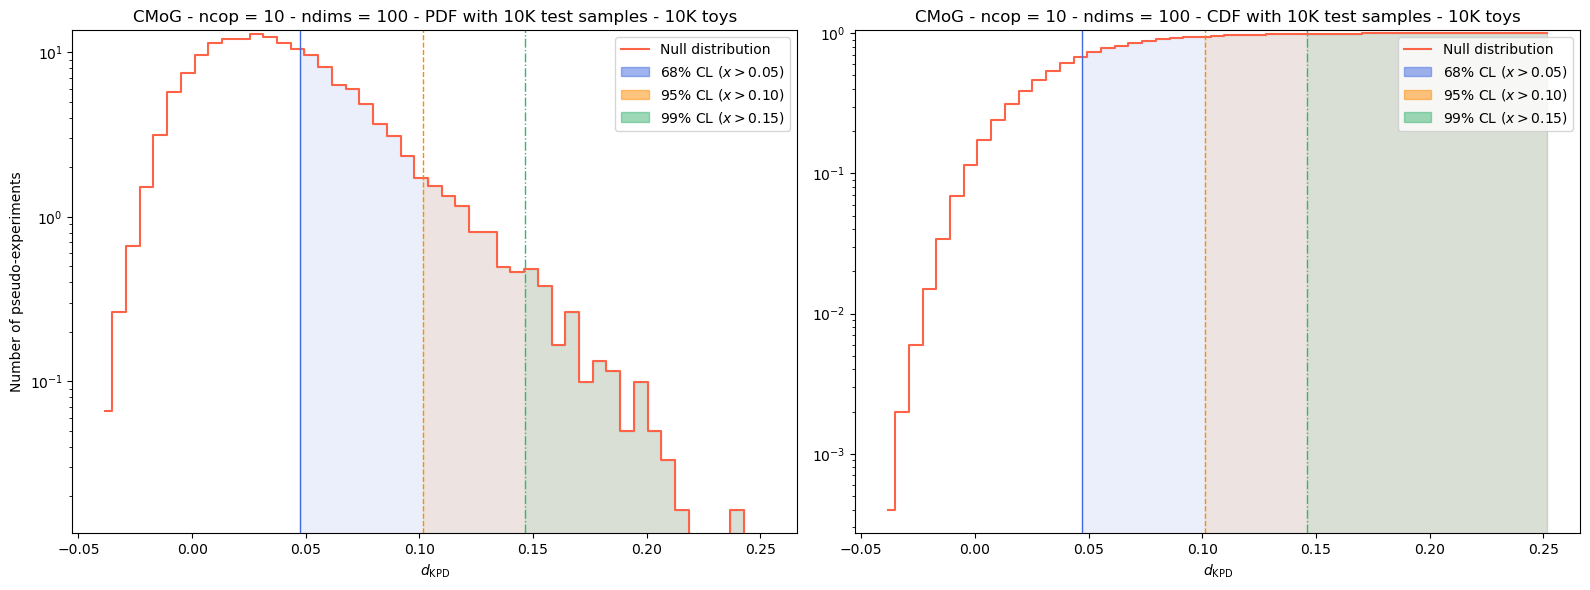

Time elapsed: 0.920824995264411 seconds.
mu = 0.864677958959213 +/- 0.0001505545409078025
sigma = 0.12270066866476421 +/- 0.0009986921392257677


/tmp/ipykernel_6092/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_6092/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_6092/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_6092/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


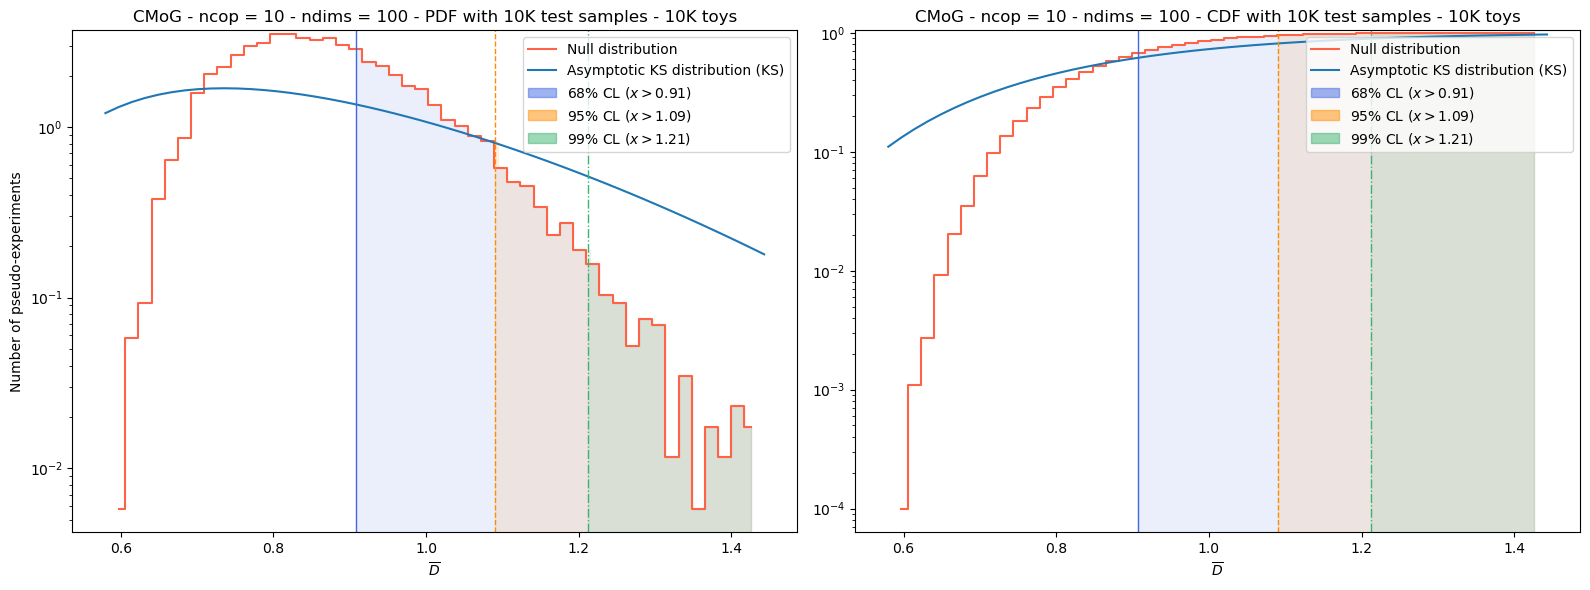

Time elapsed: 1.2477468326687813 seconds.
mu = 0.864318154218513 +/- 0.00012835307403313297
sigma = 0.11329301568637537 +/- 0.0009140666435986401


/tmp/ipykernel_6092/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_6092/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_6092/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_6092/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


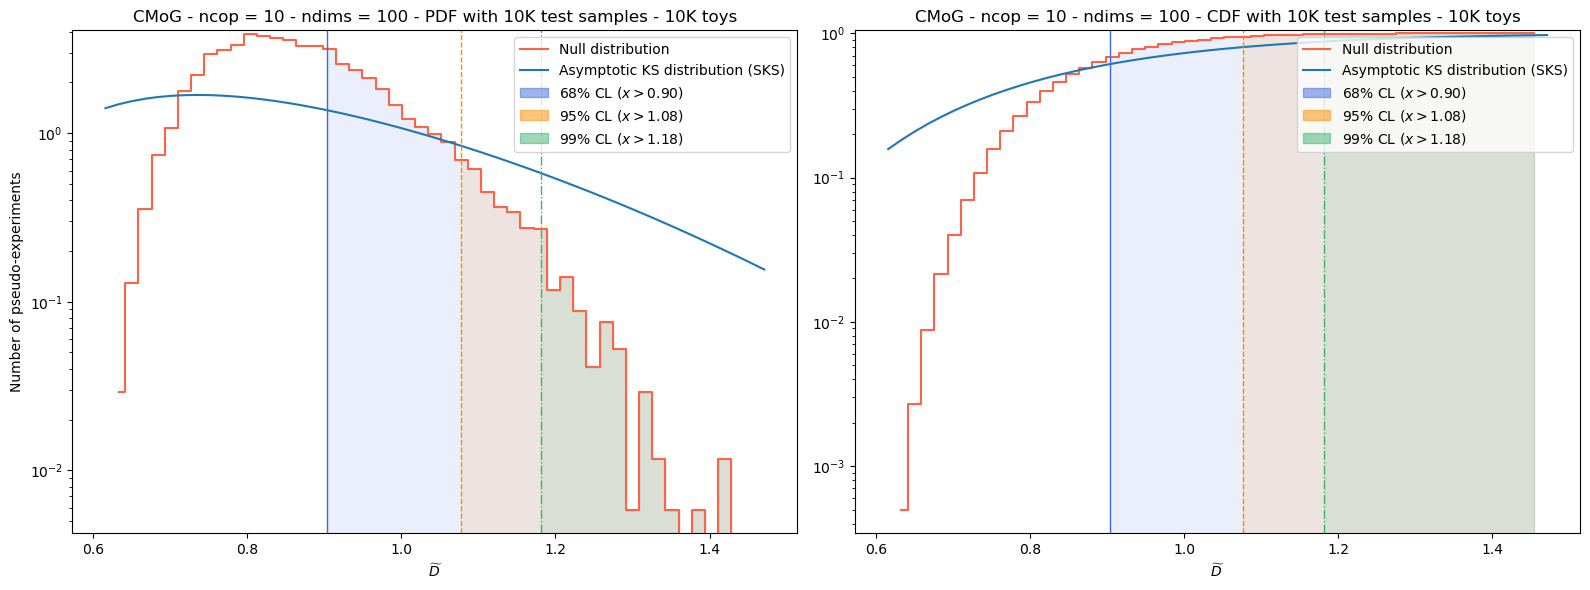

Time elapsed: 1.569901168346405 seconds.
mu = 0.2983922542478831 +/- 3.66893712608093e-05
sigma = 0.06057175188221759 +/- 0.0004637608702027067


/tmp/ipykernel_6092/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_6092/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_6092/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_6092/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


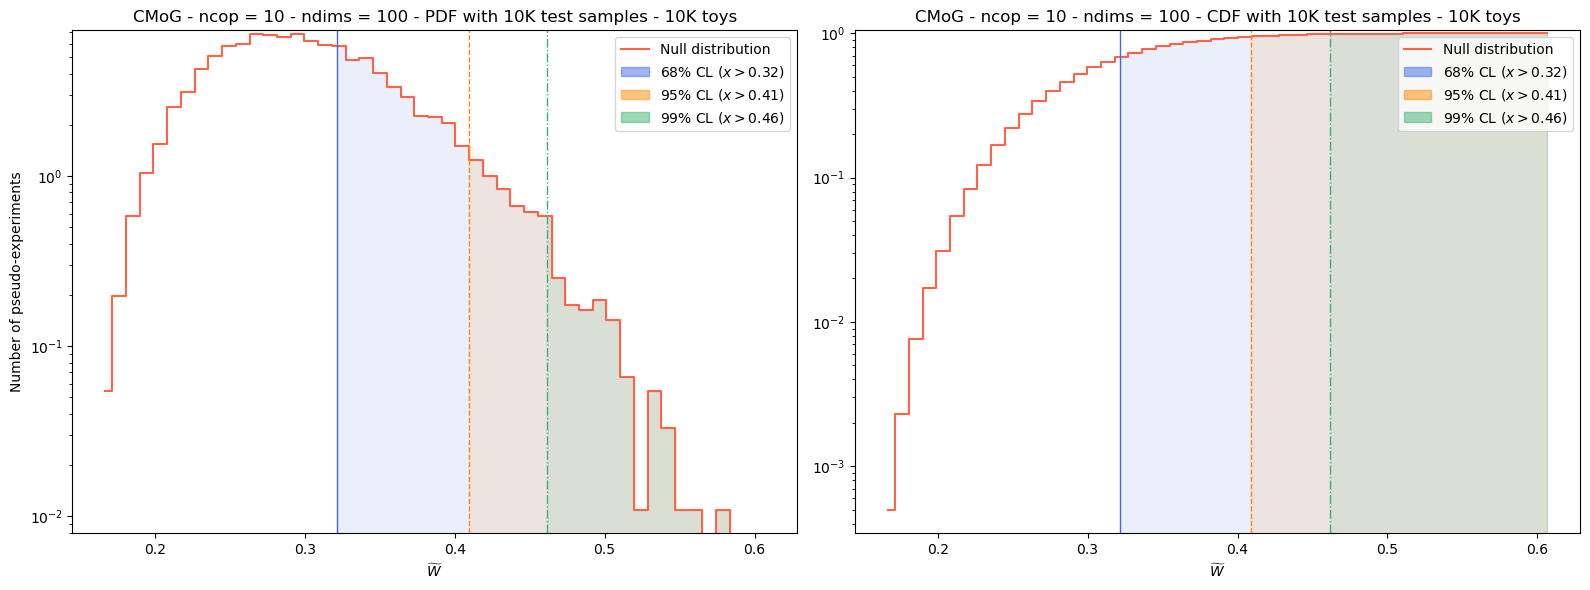

Time elapsed: 1.203964676707983 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7fc98192e3b0>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 10000, 'ba...",200,$\overline{\|\cdot\|}_{F}$,../results/100D_10K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.9190262949972976], [0....",../results/100D_10K/null_hypothesis/FN.pdf
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7fc98192e440>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$d_{\mathrm{FPD}}$,../results/100D_10K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 2.125009796879998], [0.9...",../results/100D_10K/null_hypothesis/FPD.pdf
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7fc98192e4d0>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",2,$d_{\mathrm{KPD}}$,../results/100D_10K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], 0.04725440173825035], [0...",../results/100D_10K/null_hypothesis/KPD.pdf
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7fc98192e560>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\overline{D}$,../results/100D_10K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9076427718802609], [0....",../results/100D_10K/null_hypothesis/KS.pdf
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fc98192e5f0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\widetilde{D}$,../results/100D_10K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.903803078077085], [0.9...",../results/100D_10K/null_hypothesis/SKS.pdf
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fc98192e680>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\widetilde{W}$,../results/100D_10K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.3215222675610459], [0....",../results/100D_10K/null_hypothesis/SWD.pdf
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7fc98192e710>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$t_{\mu}$,../results/100D_10K/null_hypothesis/LR.json,[],NaN


In [12]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Asymptotic KS distribution (" + name_cap + ")")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex)
    ax[0].set_ylabel('Number of pseudo-experiments')
    ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right')
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Asymptotic KS distribution (" + name_cap + ")")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex)
    ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right')
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Test config and exclusion function

In [13]:
def compute_exclusion_bisection(metric_config: Dict[str,Any],
                                test_kwargs: Dict[str,Any],
                                deformation: str = "mean", # could be mean, std, or both
                                seed_dist: int = 0,
                                x_tol: float = 0.01,
                                fn_tol: float = 0.01,
                                eps_min: float = 0.,
                                eps_max: float = 1.,
                                initial_division_factor: float = 1 / 2.,
                                reduce_division_factor: float = 1.,
                                max_iterations: int = 100,
                                save: bool = True,
                                verbose: bool = True
                               ) -> Dict[str,Any]:
    # Generate timestamp for result
    timestamp: str = datetime.now().isoformat()
    
    if verbose:
        print("\n======================================================")
    if deformation == "mean":
        if verbose:
            print(f"=============== {metric_config['name']} - only mean ===============")
    elif deformation == "std":
        if verbose:
            print(f"=============== {metric_config['name']} - only std ===============")
    elif deformation == "both":
        if verbose:
            print(f"=============== {metric_config['name']} - mean+std ===============")
    else:
        raise ValueError(f"Invalid value for mean_std_both: {deformation}")
    if verbose:
        print("======================================================") 
    
    # Define metric name:
    metric_name = metric_config["name"]
    metric_class = eval(metric_config["class_name"])
    metric_kwargs = metric_config["kwargs"]
    metric_result_key = metric_config["result_key"]
    metric_scale_func = metric_config["scale_func"]
    max_vectorize = metric_config["max_vectorize"]
    
    # Compute metric scaling factor
    nsamples = test_kwargs["batch_size_test"]
    ns = nsamples**2 / (2 * nsamples)

    metrics_list = []
    eps_list = []
    exclusion_list = []

    metric_thresholds = metric_config["thresholds"][-2:]
    metric_threshold_number = 0
    eps_min_start = eps_min
    eps_max_start = eps_max
    division_factor = initial_division_factor
    initial_relative_error_eps = 2 * (eps_max - eps_min) / (eps_max + eps_min)
    relative_error_eps_threshold = initial_relative_error_eps
    initial_relative_error_metric = 2 * (eps_max - eps_min) / (eps_max + eps_min)
    relative_error_metric_threshold = initial_relative_error_metric
    eps = (eps_max + eps_min) / 2.

    start_global = timer()
    start = timer()
    
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed_dist)

    iteration = 0

    while metric_threshold_number < len(metric_thresholds) and iteration < max_iterations:
        iteration += 1
        
        if deformation == "mean":
            eps_mean = eps
            eps_std = 0.
        elif deformation == "std":
            eps_mean = 0.
            eps_std = eps
        else:
            eps_mean = eps
            eps_std = eps
        
        print(f"\n------------ {iteration} ------------")
        print(f"eps = {eps}")
        
        dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_mean, eps_std, seed_dist)

        TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                           dist_2_input = dist_2,
                                                           **test_kwargs)

        Metric = metric_class(TwoSampleTestInputs, **metric_kwargs) # type: ignore
        Metric.Test_tf(max_vectorize=max_vectorize)
        metric = np.mean(Metric.Results[-1].result_value[metric_result_key]) * metric_scale_func(ns, ndims) # type: ignore

        metrics_list.append(metric)
        eps_list.append(eps)

        # Determine direction of adjustment based on overshooting or undershooting
        if metric > metric_thresholds[metric_threshold_number][2]: # type: ignore
            #direction = -1
            eps_max = eps  # Update the maximum bound
            eps = eps_max - (eps_max - eps_min) * division_factor
        else:
            #direction = 1
            eps_min = eps  # Update the minimum bound
            eps = eps_min + (eps_max - eps_min) * division_factor
                        
        if verbose:
            print(f"statistic = {metric} - next threshold = {metric_thresholds[metric_threshold_number][2]} at {metric_thresholds[metric_threshold_number][0]} CL")

        relative_error_eps = 2 * (eps_max - eps_min) / (eps_max + eps_min)
        relative_error_metric = 2 * (metric_thresholds[metric_threshold_number][2] - metric) / (metric_thresholds[metric_threshold_number][2] + metric)

        if division_factor / reduce_division_factor <= 1 / 2.:
            division_factor = 1 / 2.
        else:
            if relative_error_eps < relative_error_eps_threshold  / 2 and relative_error_metric < relative_error_metric_threshold / 2:
                print(f"Relative error halved. Reducing division factor from {division_factor} to {division_factor / reduce_division_factor}")
                relative_error_eps_threshold = relative_error_eps
                relative_error_metric_threshold = relative_error_metric
                division_factor = division_factor / reduce_division_factor
            
        
        # Check if the fn value is within the required accuracy of the threshold
        if relative_error_eps < x_tol and relative_error_metric < fn_tol:
            end = timer()
            if verbose:
                print(f"=======> statistic within required accuracy at {metric_thresholds[metric_threshold_number][0]} CL in {end - start} seconds")
            exclusion_list.append([metric_thresholds[metric_threshold_number][0], metric_name, eps, metric, end - start])
            metric_threshold_number += 1
            print("\n======================================================")
            print("New threshold. Resetting eps_min and eps_max.")
            start = timer() # Reset the timer
            iteration = 0
            eps_min, eps_max = eps, eps_max_start # Initialize the bounds
            division_factor = initial_division_factor
            relative_error_eps_threshold = initial_relative_error_eps
            relative_error_metric_threshold = initial_relative_error_metric
        
    end = timer()
    if verbose:
        print("Time elapsed:", end - start_global, "seconds.")
    result = {timestamp: {"test_config": test_kwargs,
                          "null_config": metric_config,
                          "deformation": deformation,
                          "parameters": {"ncomp": ncomp,
                                         "seed_dist": seed_dist,
                                         "x_tol": x_tol,
                                         "fn_tol": fn_tol,
                                         "eps_min": eps_min_start,
                                         "eps_max": eps_max_start,
                                         "max_iterations": max_iterations,
                                         "save": save,
                                         "verbose": verbose},
                          "exclusion_list": exclusion_list,
                          "eps_list": eps_list,
                          "metrics_list": metrics_list,
                          "time_elapsed": end - start_global}}
    
    # Saving if required
    if save:
        file_path = model_dir + "exclusion_limits.json"
        if verbose:
            print(f"Saving results in the file {file_path}")
        # Step 1: Read the existing content if the file exists
        existing_data = {}
        if os.path.exists(file_path):
            try:
                with open(file_path, "r") as file:
                    existing_data = json.load(file)
            except json.JSONDecodeError:
                # File is empty or corrupted, start with an empty dictionary
                existing_data = {}
        
        # Step 2: Update the dictionary with new results
        existing_data.update(result)
        
        # Step 3: Write the updated dictionary back to the file
        # Use this custom encoder when dumping your JSON data
        with open(file_path, "w") as file:
            json.dump(existing_data, file, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore
    
    return result

In [14]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

### Scan and exclusion limits (bisection method)

In [15]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[2:-1]:
    for deformation in deformations:
        result = compute_exclusion_bisection(metric_config = metric_config,
                                             test_kwargs = test_kwargs,
                                             deformation = deformation,
                                             seed_dist = 0,
                                             x_tol = 0.01,
                                             fn_tol = 0.01,
                                             eps_min = 0.,
                                             eps_max = 5.,
                                             #initial_division_factor = 1/2.,
                                             #reduce_division_factor = 1.,
                                             max_iterations = 100,
                                             save = True,
                                             verbose = True)
        global_results.update(result)


=============== kpd - only mean ===============

------------ 1 ------------
eps = 2.5
statistic = 13.250015944477434 - next threshold = 0.10140783177847723 at 0.95 CL

------------ 2 ------------
eps = 1.25
statistic = 3.288248695081375 - next threshold = 0.10140783177847723 at 0.95 CL

------------ 3 ------------
eps = 0.625
statistic = 0.848522398336482 - next threshold = 0.10140783177847723 at 0.95 CL

------------ 4 ------------
eps = 0.3125
statistic = 0.23255384868048345 - next threshold = 0.10140783177847723 at 0.95 CL

------------ 5 ------------
eps = 0.15625
statistic = 0.08195829294925794 - next threshold = 0.10140783177847723 at 0.95 CL

------------ 6 ------------
eps = 0.234375
statistic = 0.14390027019071105 - next threshold = 0.10140783177847723 at 0.95 CL

------------ 7 ------------
eps = 0.1953125
statistic = 0.10973930827555822 - next threshold = 0.10140783177847723 at 0.95 CL

------------ 8 ------------
eps = 0.17578125
statistic = 0.09506067274673846 - next thr

### Likelihood-ratio test

In [ ]:
def compute_exclusion_LR_bisection(metric_config: Dict[str,Any],
                                   test_kwargs: Dict[str,Any],
                                   cl_list = [0.95, 0.99],
                                   deformation: str = "mean", # could be mean, std, or both
                                   seed_dist: int = 0,
                                   x_tol: float = 0.01,
                                   fn_tol: float = 0.01,
                                   eps_min: float = 0.,
                                   eps_max: float = 1.,
                                   initial_division_factor: float = 1 / 2.,
                                   reduce_division_factor: float = 1.,
                                   max_iterations: int = 100,
                                   save: bool = True,
                                   verbose: bool = True
                                  ) -> Dict[str,Any]:
    # Generate timestamp for result
    timestamp: str = datetime.now().isoformat()
    
    if verbose:
        print("\n======================================================")
    if deformation == "mean":
        if verbose:
            print(f"=============== {metric_config['name']} - only mean ===============")
    elif deformation == "std":
        if verbose:
            print(f"=============== {metric_config['name']} - only std ===============")
    elif deformation == "both":
        if verbose:
            print(f"=============== {metric_config['name']} - mean+std ===============")
    else:
        raise ValueError(f"Invalid value for mean_std_both: {deformation}")
    if verbose:
        print("======================================================")
        
    test_kwargs_null = dict(test_kwargs)
    test_kwargs_alt = dict(test_kwargs)
    test_kwargs_alt["niter"] = 10
    
    metric_kwargs_null = dict(metric_config["kwargs"])
    metric_kwargs_alt = dict(metric_config["kwargs"])
    metric_kwargs_null["null_test"] = True
    metric_kwargs_alt["null_test"] = False
    metric_kwargs_null["verbose"] = True
    metric_kwargs_alt["verbose"] = True
    
    metric_name = metric_config["name"]
    metric_result_key = metric_config["result_key"]
    metric_scale_func = metric_config["scale_func"]
    max_vectorize = metric_config["max_vectorize"]
    null_file_base = metric_config["null_file"]
    
    # Compute metric scaling factor
    nsamples = test_kwargs["batch_size_test"]
    ns = nsamples**2 / (2 * nsamples)
    
    metrics_list = []
    eps_list = []
    exclusion_list = []
    
    metric_threshold_number = 0
    eps_min_start = eps_min
    eps_max_start = eps_max
    division_factor = initial_division_factor
    initial_relative_error_eps = 2 * (eps_max - eps_min) / (eps_max + eps_min)
    relative_error_eps_threshold = initial_relative_error_eps
    initial_relative_error_metric = 2 * (eps_max - eps_min) / (eps_max + eps_min)
    relative_error_metric_threshold = initial_relative_error_metric
    eps = (eps_max + eps_min) / 2.
    
    start_global = timer()
    start = timer()
    
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed_dist)

    iteration = 0

    while metric_threshold_number < len(cl_list) and iteration < max_iterations:
        iteration += 1

        if deformation == "mean":
            eps_mean = eps
            eps_std = 0.
        elif deformation == "std":
            eps_mean = 0.
            eps_std = eps
        else:
            eps_mean = eps
            eps_std = eps
            
        print(f"\n------------ {iteration} ------------")
        print(f"eps = {eps}")

        print(f"Computing null distribution")
        start_null = timer()
        dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_mean, eps_std, seed_dist)
        
        TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                           dist_2_input = dist_2,
                                                           **test_kwargs_null)
        
        LRMetric_null = GMetrics.LRMetric(TwoSampleTestInputs, **metric_kwargs_null)
        LRMetric_null.Test_tf(max_vectorize = max_vectorize)
        
        null_file = null_file_base.replace(".json", "_" + deformation + "_" + str(format(eps, '.6f')) + ".json")
        print("Saving", name, "to", null_file)
        LRMetric_null.Results.save_to_json(null_file)
        
        dist_null = np.array(LRMetric_null.Results[-1].result_value[metric_result_key]) * metric_scale_func(ns, ndims)
        metric_thresholds = [[cl, 
                              [int(cl*len(dist_null)), 
                               int((1-cl)*len(dist_null))], 
                              np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
        print(f"ThresholdS: {metric_thresholds}")
        metrics_config[unique_key]["lr"]["thresholds"].append([eps, deformation, metric_thresholds])
        GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore
        end_null = timer()
        print(f"Null distribution computed in {end_null - start_null} seconds")
        
        print(f"Evaluating alternative distribution")
        TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                           dist_2_input = dist_2,
                                                           **test_kwargs_alt)
        LRMetric_alt = GMetrics.LRMetric(TwoSampleTestInputs, **metric_kwargs_alt)
        LRMetric_alt.Test_tf(max_vectorize = max_vectorize)
        metric = np.mean(LRMetric_alt.Results[-1].result_value[metric_result_key]) * metric_scale_func(ns, ndims) # type: ignore
        
        metrics_list.append(metric)
        eps_list.append(eps)

        # Determine direction of adjustment based on overshooting or undershooting
        if metric > metric_thresholds[metric_threshold_number][2]: # type: ignore
            #direction = -1
            eps_max = eps  # Update the maximum bound
            eps = eps_max - (eps_max - eps_min) * division_factor
        else:
            #direction = 1
            eps_min = eps  # Update the minimum bound
            eps = eps_min + (eps_max - eps_min) * division_factor
                        
        if verbose:
            print(f"statistic = {metric} - next threshold = {metric_thresholds[metric_threshold_number][2]} at {metric_thresholds[metric_threshold_number][0]} CL")

        relative_error_eps = 2 * (eps_max - eps_min) / (eps_max + eps_min)
        relative_error_metric = 2 * np.abs(metric_thresholds[metric_threshold_number][2] - metric) / (metric_thresholds[metric_threshold_number][2] + metric)

        if division_factor / reduce_division_factor <= 1 / 2.:
            division_factor = 1 / 2.
        else:
            if relative_error_eps < relative_error_eps_threshold  / 2 and relative_error_metric < relative_error_metric_threshold / 2:
                print(f"Relative error halved. Reducing division factor from {division_factor} to {division_factor / reduce_division_factor}")
                relative_error_eps_threshold = relative_error_eps
                relative_error_metric_threshold = relative_error_metric
                division_factor = division_factor / reduce_division_factor
            
        
        # Check if the fn value is within the required accuracy of the threshold
        if relative_error_eps < x_tol and relative_error_metric < fn_tol:
            end = timer()
            if verbose:
                print(f"=======> statistic within required accuracy at {metric_thresholds[metric_threshold_number][0]} CL in {end - start} seconds")
            exclusion_list.append([metric_thresholds[metric_threshold_number][0], metric_name, eps, metric, end - start])
            metric_threshold_number += 1
            print("\n======================================================")
            print("New threshold. Resetting eps_min and eps_max.")
            start = timer() # Reset the timer
            iteration = 0
            eps_min, eps_max = eps, eps_max_start # Initialize the bounds
            division_factor = initial_division_factor
            relative_error_eps_threshold = initial_relative_error_eps
            relative_error_metric_threshold = initial_relative_error_metric
            
    end = timer()
    if verbose:
        print("Time elapsed:", end - start_global, "seconds.")
    result = {timestamp: {"test_config": test_kwargs,
                          "null_config": metric_config,
                          "deformation": deformation,
                          "parameters": {"ncomp": ncomp,
                                         "seed_dist": seed_dist,
                                         "x_tol": x_tol,
                                         "fn_tol": fn_tol,
                                         "eps_min": eps_min_start,
                                         "eps_max": eps_max_start,
                                         "max_iterations": max_iterations,
                                         "save": save,
                                         "verbose": verbose},
                          "exclusion_list": exclusion_list,
                          "eps_list": eps_list,
                          "metrics_list": metrics_list,
                          "time_elapsed": end - start_global}}
    
    # Saving if required
    if save:
        file_path = model_dir + "exclusion_limits.json"
        if verbose:
            print(f"Saving results in the file {file_path}")
        # Step 1: Read the existing content if the file exists
        existing_data = {}
        if os.path.exists(file_path):
            try:
                with open(file_path, "r") as file:
                    existing_data = json.load(file)
            except json.JSONDecodeError:
                # File is empty or corrupted, start with an empty dictionary
                existing_data = {}
        
        # Step 2: Update the dictionary with new results
        existing_data.update(result)
        
        # Step 3: Write the updated dictionary back to the file
        # Use this custom encoder when dumping your JSON data
        with open(file_path, "w") as file:
            json.dump(existing_data, file, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore
    
    return result

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
deformations = ["mean", "std", "both"]
global_results = {}

for deformation in deformations:
    result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                            test_kwargs = test_kwargs,
                                            cl_list = [0.95, 0.99],
                                            deformation = deformation,
                                            seed_dist = 0,
                                            x_tol = 0.01,
                                            fn_tol = 0.01,
                                            eps_min = 0.,
                                            eps_max = 0.005,
                                            max_iterations = 100,
                                            save = True,
                                            verbose = True)
    global_results.update(result)


=============== lr - only mean ===============

------------ 1 ------------
eps = 0.0025
Computing null distribution
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000
nchunks = 200
Iterating from 0 to 50 out of 10000 .
Iterating from 50 to 100 out of 10000 .
Iterating from 100 to 150 out of 10000 .
Iterating from 150 to 200 out of 10000 .
Iterating from 200 to 250 out of 10000 .
Iterating from 250 to 300 out of 10000 .
Iterating from 300 to 350 out of 10000 .
Iterating from 350 to 400 out of 10000 .
Iterating from 400 to 450 out of 10000 .
Iterating from 450 to 500 out of 10000 .
Iterating from 500 to 550 out of 10000 .
Iterating from 550 to 600 out of 10000 .
Iterating from 600 to 650 out of 10000 .
Iterating from 650 to 700 out of 10000 .
Iterating from 700 to 750 out of 10000 .
Iterating from 750 to 800 out of 100

### Show and save results

In [15]:
# import exclusion_limits.json file
deformations = ["mean", "std", "both"]
global_results = {}

exclusion_limits_file = model_dir + "exclusion_limits.json"
with open(exclusion_limits_file, "r") as file:
    exclusion_limits = json.load(file)
    
global_results.update(exclusion_limits)

In [26]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".8f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".8f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, time_elapsed])
results_df = pd.DataFrame(results, columns=["name", "deformation", "ndims", "niter", "nsamples", "exclusion_95", "exclusion_99", "time_elapsed"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [27]:
results_df_mean = results_df[results_df["deformation"] == "mean"]
results_df_std = results_df[results_df["deformation"] == "std"]
results_df_both = results_df[results_df["deformation"] == "both"]

In [28]:
results_df_mean.sort_values(by="exclusion_95", ascending=True)

,name,deformation,ndims,niter,nsamples,exclusion_95,exclusion_99,time_elapsed
18,lr,mean,100,10000,10000,0.000006,0.000010,4350.948104
9,ks,mean,100,10000,10000,0.004101,0.007283,1055.152002
12,sks,mean,100,10000,10000,0.061340,0.081536,772.215842
15,swd,mean,100,10000,10000,0.086975,0.119061,586.305214
3,fpd,mean,100,10000,10000,0.093506,0.126703,539.558054
0,fn,mean,100,10000,10000,0.094482,0.126759,245.210026
6,kpd,mean,100,10000,10000,0.184937,0.237836,713.093632


In [29]:
results_df_std.sort_values(by="exclusion_95", ascending=True)

,name,deformation,ndims,niter,nsamples,exclusion_95,exclusion_99,time_elapsed
19,lr,std,100,10000,10000,0.000012,0.000019,4139.589341
10,ks,std,100,10000,10000,0.009499,0.022368,994.781432
4,fpd,std,100,10000,10000,0.329102,0.429998,448.273915
13,sks,std,100,10000,10000,0.445557,0.545630,646.435092
16,swd,std,100,10000,10000,0.529785,0.632373,441.291227
1,fn,std,100,10000,10000,0.755859,0.889374,159.105783
7,kpd,std,100,10000,10000,3.447266,3.974953,479.697009


In [30]:
results_df_both.sort_values(by="exclusion_95", ascending=True)

,name,deformation,ndims,niter,nsamples,exclusion_95,exclusion_99,time_elapsed
20,lr,both,100,10000,10000,0.000005,0.000008,4479.421627
11,ks,both,100,10000,10000,0.003443,0.005749,1167.069477
14,sks,both,100,10000,10000,0.060272,0.080473,885.358933
17,swd,both,100,10000,10000,0.085754,0.117848,597.218454
5,fpd,both,100,10000,10000,0.090088,0.121633,549.172961
2,fn,both,100,10000,10000,0.093994,0.126288,255.565406
8,kpd,both,100,10000,10000,0.183716,0.236629,721.386630


In [22]:
eps_max_for_LR = eval(min(results_df_mean["exclusion_95"].to_numpy()))
eps_max_for_LR

0.004

# Fixed $n=100000$

## Null hypotheses

### Model definition

In [2]:
seed = 0
ncomp = 10
ndims = 100
niter = 10_000
batch_size_test = 100_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)


In [3]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 1_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 1000000000
batch_size 100000
niter 10000
niter * batch_size 1000000000
small_sample False


In [5]:
TwoSampleTestInputs.dist_1_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [6]:
TwoSampleTestInputs.dist_2_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [7]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [8]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,is_symb_1,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample
0,10000,100000,1000,10000000,float64,0,True,False,None,True,True,100,0,True,100,0,float64,100,1000000000,False


In [9]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: (ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: (ns/ndims)**(3/2)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: ns/np.sqrt(ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 100000,
   'batch_size_gen': 1000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 100,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 100,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 100,
   'nsamples': 1000000000,
   'small_sample': False},
  'max_vectorize': 20,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/100D_100K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key': 'metric_list

### Compute/save/load null hypotheses

In [11]:
for metric in list(metrics_config[unique_key].values())[0:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and saving {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

#obj.Results[-1].result_value

Loading fn from ../results/100D_100K/null_hypothesis/FN.json
Loading fpd from ../results/100D_100K/null_hypothesis/FPD.json
Loading kpd from ../results/100D_100K/null_hypothesis/KPD.json
Loading ks from ../results/100D_100K/null_hypothesis/KS.json
Loading sks from ../results/100D_100K/null_hypothesis/SKS.json
Loading swd from ../results/100D_100K/null_hypothesis/SWD.json


In [12]:
cl_list = [0.68, 0.95, 0.99]

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.9258989284309033], [0.95, [9500, 500], 1.1755846953979594], [0.99, [9900, 100], 1.3288920439846852]]
ThresholdS for metric fpd: [[0.68, [6800, 3199], 8.221457181835765], [0.95, [9500, 500], 11.42397609382258], [0.99, [9900, 100], 13.729975687111372]]
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.026853186154696118], [0.95, [9500, 500], 0.25166410386745497], [0.99, [9900, 100], 0.41025061594979206]]
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9141729251025132], [0.95, [9500, 500], 1.0960093292742217], [0.99, [9900, 100], 1.2174511839365685]]
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9128308117849685], [0.95, [9500, 500], 1.0826608170592023], [0.99, [9900, 100], 1.1999201775449875]]
ThresholdS for metric swd: [[0.68, [6800, 3199], 0.334238442236101], [0.95, [9500, 500], 0.4252115016438996], [0.99, [9900, 100], 0.4848037528615308]]


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7fdf9764ef80>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$\overline{\|\cdot\|}_{F}$,../results/100D_100K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.9258989284309033], [0...."
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7fdf9764f010>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$d_{\mathrm{FPD}}$,../results/100D_100K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 8.221457181835765], [0.9..."
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7fdf9764f0a0>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",2,$d_{\mathrm{KPD}}$,../results/100D_100K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], 0.026853186154696118], [..."
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7fdf9764f130>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",2000,$\overline{D}$,../results/100D_100K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9141729251025132], [0...."
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fdf9764f1c0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$\widetilde{D}$,../results/100D_100K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.9128308117849685], [0...."
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fdf9764f250>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$\widetilde{W}$,../results/100D_100K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.334238442236101], [0.9..."
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7fdf9764f2e0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$t_{\mu}$,../results/100D_100K/null_hypothesis/LR.json,[]


### Plots of null-hypotheses

mu = 0.8487354811396679 +/- 0.00033789064671807615
sigma = 0.18381802053065313 +/- 0.0013811382888967638


/tmp/ipykernel_4014/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4014/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4014/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4014/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


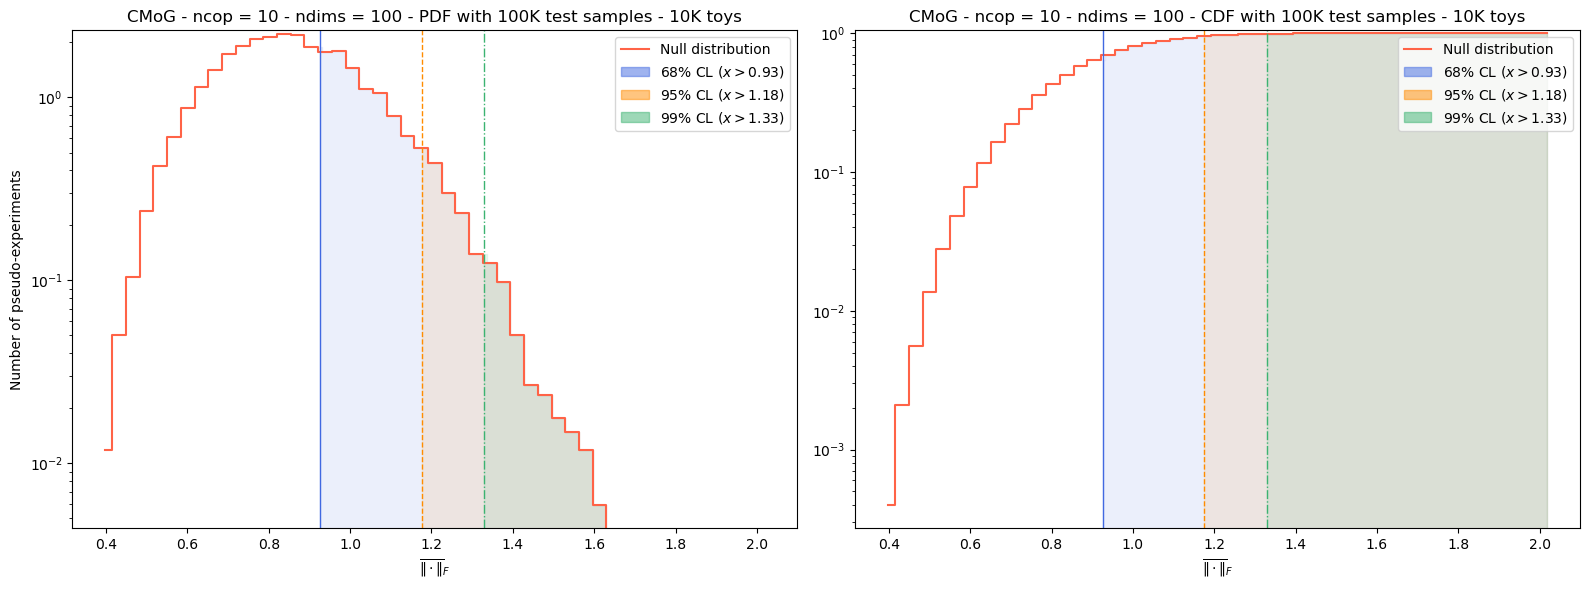

Time elapsed: 1.094465471804142 seconds.
mu = 7.069964198067763 +/- 0.07735860399056298
sigma = 2.7813414747305476 +/- 0.02373925005512347


/tmp/ipykernel_4014/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4014/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4014/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4014/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


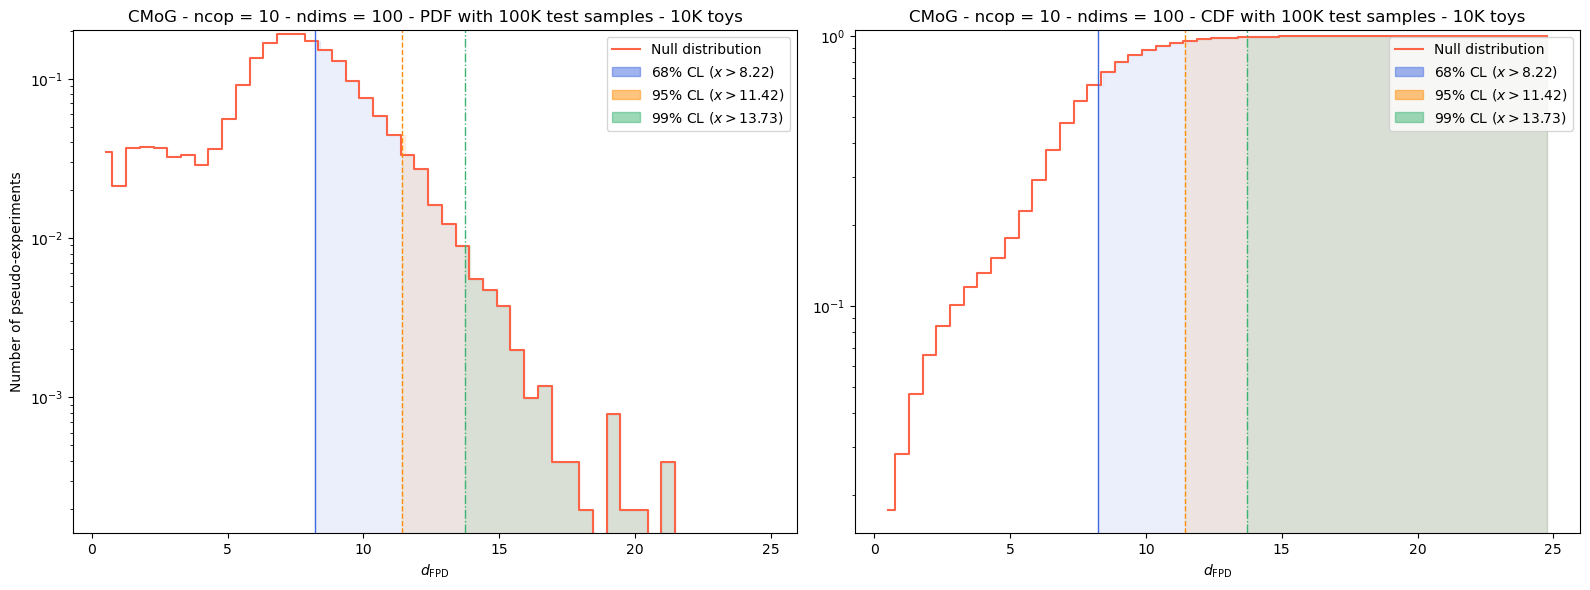

Time elapsed: 0.8014550730586052 seconds.
mu = -0.03880754202424198 +/- 0.00027282015121302095
sigma = 0.1651726827332598 +/- 0.0013365369344893643


/tmp/ipykernel_4014/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4014/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4014/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4014/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


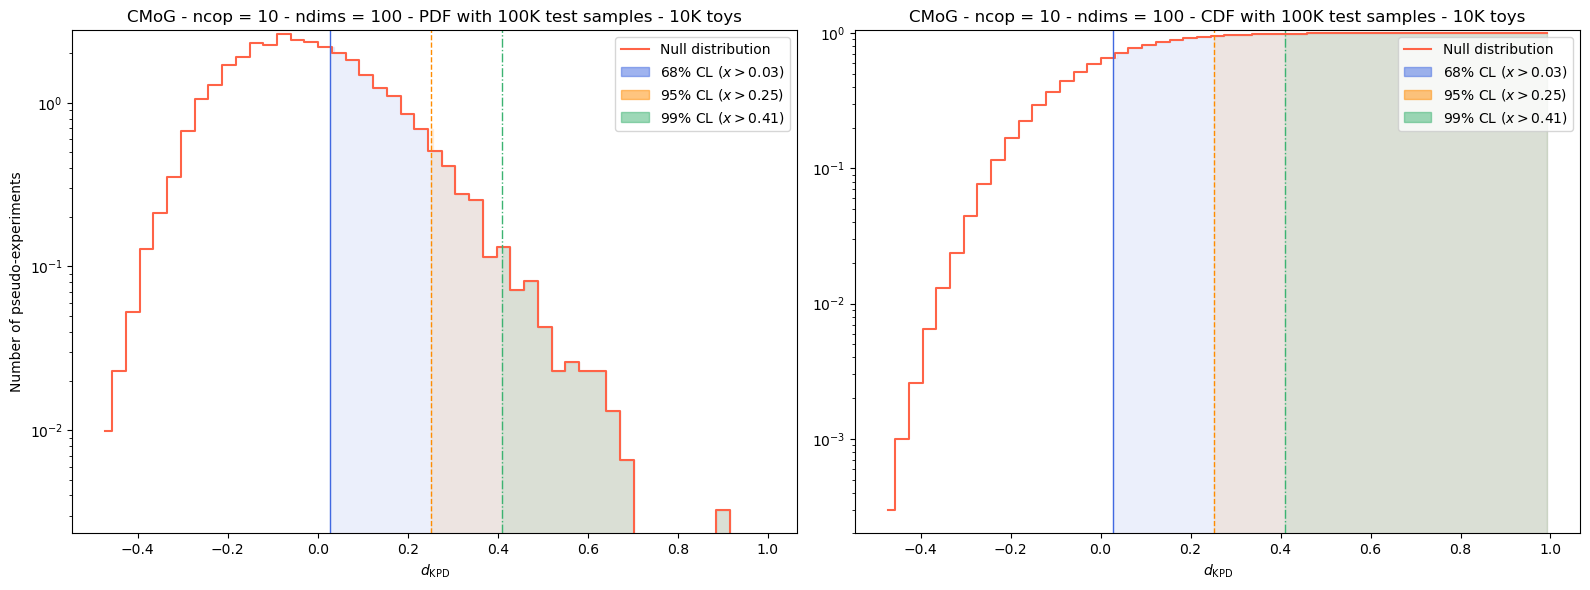

Time elapsed: 0.8993796203285456 seconds.
mu = 0.8695765694473794 +/- 0.0001516315439172587
sigma = 0.12313876072027796 +/- 0.001003058525001457


/tmp/ipykernel_4014/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4014/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4014/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4014/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


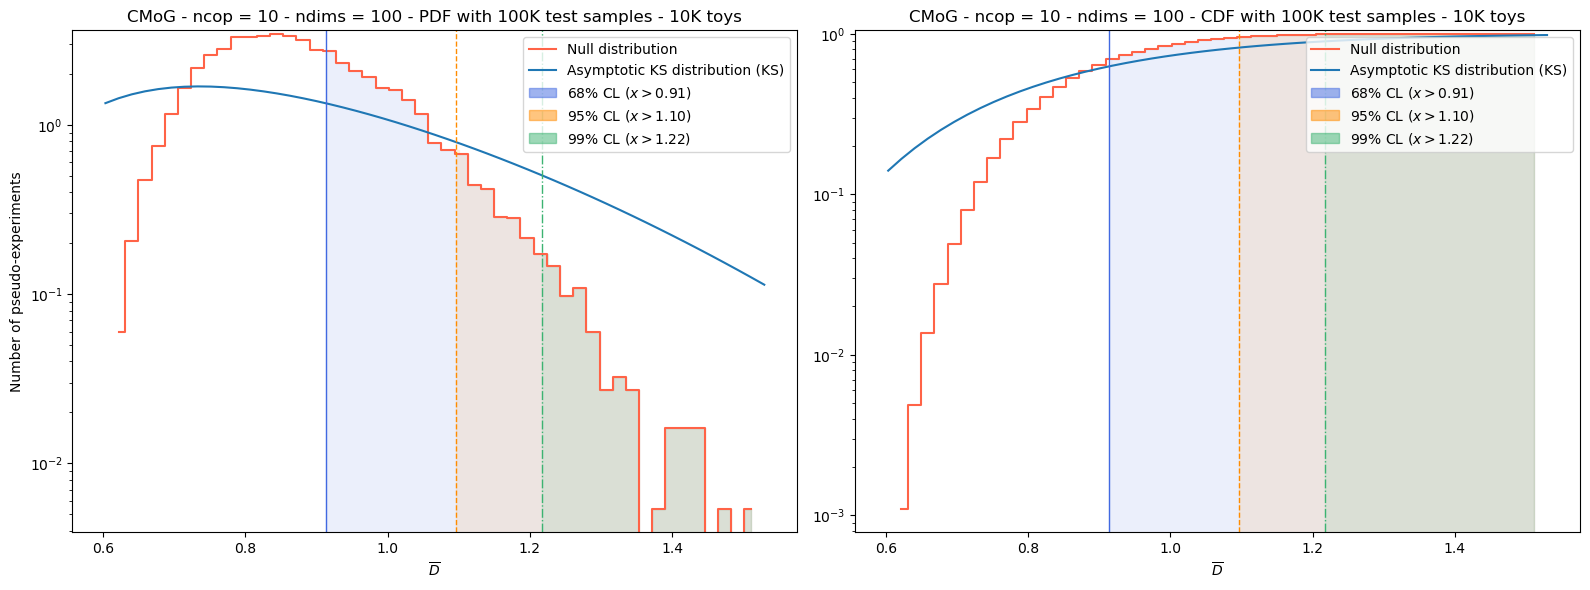

Time elapsed: 1.8452329728752375 seconds.
mu = 0.8694493949517444 +/- 0.0001355086357521678
sigma = 0.11640817658230361 +/- 0.0009378680481043849


/tmp/ipykernel_4014/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4014/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4014/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4014/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


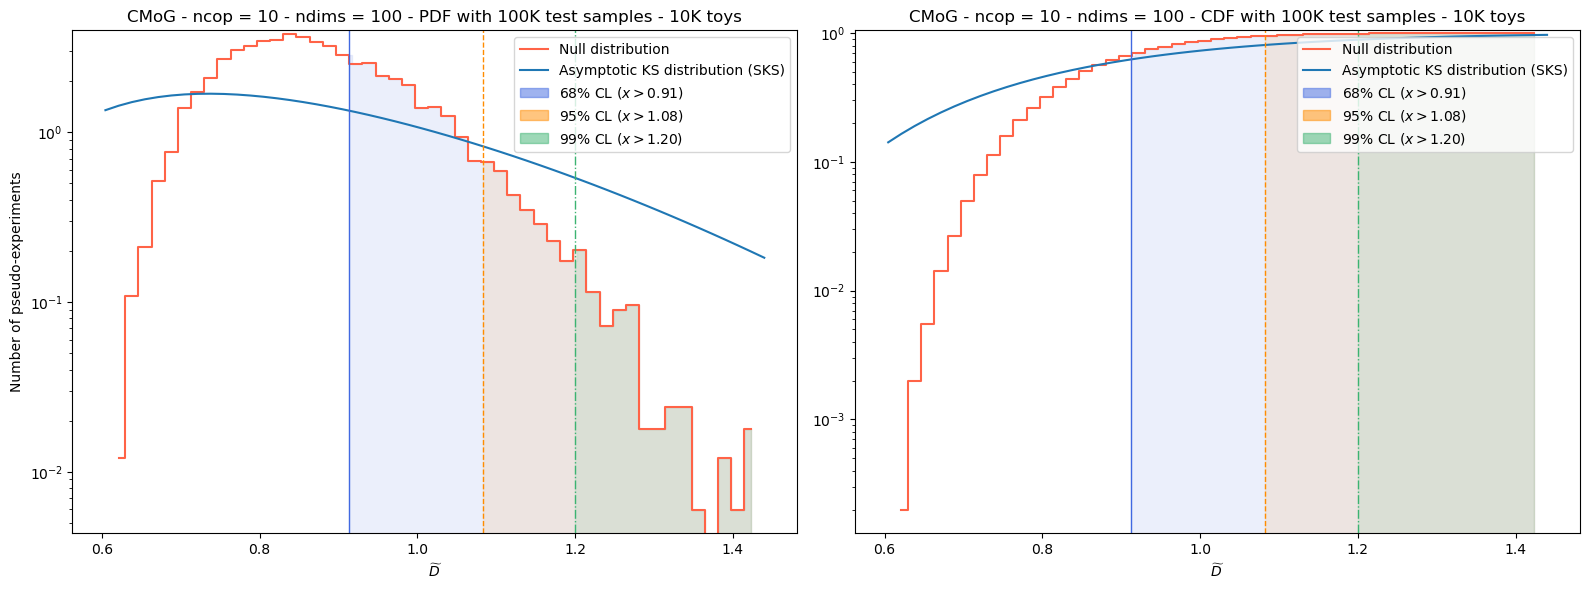

Time elapsed: 1.417887233197689 seconds.
mu = 0.3094153676259014 +/- 4.1475367329474304e-05
sigma = 0.0644013721355953 +/- 0.0004879690422926139


/tmp/ipykernel_4014/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4014/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4014/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4014/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


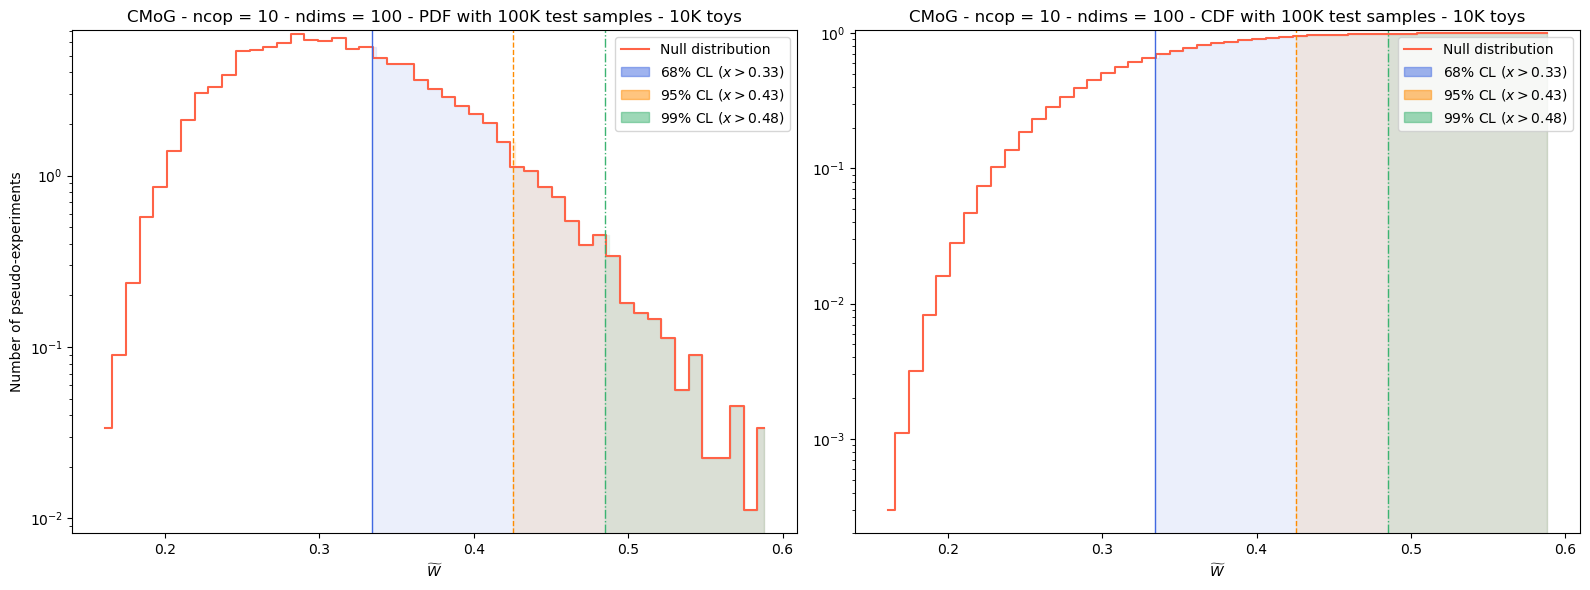

Time elapsed: 1.1931215953081846 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7fdf9764ef80>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$\overline{\|\cdot\|}_{F}$,../results/100D_100K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.9258989284309033], [0....",../results/100D_100K/null_hypothesis/FN.pdf
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7fdf9764f010>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$d_{\mathrm{FPD}}$,../results/100D_100K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 8.221457181835765], [0.9...",../results/100D_100K/null_hypothesis/FPD.pdf
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7fdf9764f0a0>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",2,$d_{\mathrm{KPD}}$,../results/100D_100K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], 0.026853186154696118], [...",../results/100D_100K/null_hypothesis/KPD.pdf
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7fdf9764f130>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",2000,$\overline{D}$,../results/100D_100K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9141729251025132], [0....",../results/100D_100K/null_hypothesis/KS.pdf
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fdf9764f1c0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$\widetilde{D}$,../results/100D_100K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.9128308117849685], [0....",../results/100D_100K/null_hypothesis/SKS.pdf
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fdf9764f250>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$\widetilde{W}$,../results/100D_100K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.334238442236101], [0.9...",../results/100D_100K/null_hypothesis/SWD.pdf
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7fdf9764f2e0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$t_{\mu}$,../results/100D_100K/null_hypothesis/LR.json,[],NaN


In [13]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Asymptotic KS distribution (" + name_cap + ")")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex)
    ax[0].set_ylabel('Number of pseudo-experiments')
    ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right')
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Asymptotic KS distribution (" + name_cap + ")")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex)
    ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right')
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Test config and exclusion function

In [14]:
def compute_exclusion_bisection(metric_config: Dict[str,Any],
                                test_kwargs: Dict[str,Any],
                                deformation: str = "mean", # could be mean, std, or both
                                seed_dist: int = 0,
                                x_tol: float = 0.01,
                                fn_tol: float = 0.01,
                                eps_min: float = 0.,
                                eps_max: float = 0.1,
                                initial_division_factor: float = 1 / 2.,
                                reduce_division_factor: float = 1.,
                                max_iterations: int = 100,
                                save: bool = True,
                                verbose: bool = True
                               ) -> Dict[str,Any]:
    # Generate timestamp for result
    timestamp: str = datetime.now().isoformat()
    
    if verbose:
        print("\n======================================================")
    if deformation == "mean":
        if verbose:
            print(f"=============== {metric_config['name']} - only mean ===============")
    elif deformation == "std":
        if verbose:
            print(f"=============== {metric_config['name']} - only std ===============")
    elif deformation == "both":
        if verbose:
            print(f"=============== {metric_config['name']} - mean+std ===============")
    else:
        raise ValueError(f"Invalid value for mean_std_both: {deformation}")
    if verbose:
        print("======================================================") 
    
    # Define metric name:
    metric_name = metric_config["name"]
    metric_class = eval(metric_config["class_name"])
    metric_kwargs = metric_config["kwargs"]
    metric_result_key = metric_config["result_key"]
    metric_scale_func = metric_config["scale_func"]
    max_vectorize = metric_config["max_vectorize"]
    
    # Compute metric scaling factor
    nsamples = test_kwargs["batch_size_test"]
    ns = nsamples**2 / (2 * nsamples)

    metrics_list = []
    eps_list = []
    exclusion_list = []

    metric_thresholds = metric_config["thresholds"][-2:]
    metric_threshold_number = 0
    eps_min_start = eps_min
    eps_max_start = eps_max
    division_factor = initial_division_factor
    initial_relative_error_eps = 2 * (eps_max - eps_min) / (eps_max + eps_min)
    relative_error_eps_threshold = initial_relative_error_eps
    initial_relative_error_metric = 2 * (eps_max - eps_min) / (eps_max + eps_min)
    relative_error_metric_threshold = initial_relative_error_metric
    eps = (eps_max + eps_min) / 2.

    start_global = timer()
    start = timer()
    
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed_dist)

    iteration = 0

    while metric_threshold_number < len(metric_thresholds) and iteration < max_iterations:
        iteration += 1
        
        if deformation == "mean":
            eps_mean = eps
            eps_std = 0.
        elif deformation == "std":
            eps_mean = 0.
            eps_std = eps
        else:
            eps_mean = eps
            eps_std = eps
        
        print(f"\n------------ {iteration} ------------")
        print(f"eps = {eps}")
        
        dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_mean, eps_std, seed_dist)

        TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                           dist_2_input = dist_2,
                                                           **test_kwargs)

        Metric = metric_class(TwoSampleTestInputs, **metric_kwargs) # type: ignore
        Metric.Test_tf(max_vectorize=max_vectorize)
        metric = np.mean(Metric.Results[-1].result_value[metric_result_key]) * metric_scale_func(ns, ndims) # type: ignore

        metrics_list.append(metric)
        eps_list.append(eps)

        # Determine direction of adjustment based on overshooting or undershooting
        if metric > metric_thresholds[metric_threshold_number][2]: # type: ignore
            #direction = -1
            eps_max = eps  # Update the maximum bound
            eps = eps_max - (eps_max - eps_min) * division_factor
        else:
            #direction = 1
            eps_min = eps  # Update the minimum bound
            eps = eps_min + (eps_max - eps_min) * division_factor
                        
        if verbose:
            print(f"statistic = {metric} - next threshold = {metric_thresholds[metric_threshold_number][2]} at {metric_thresholds[metric_threshold_number][0]} CL")

        relative_error_eps = 2 * (eps_max - eps_min) / (eps_max + eps_min)
        relative_error_metric = 2 * (metric_thresholds[metric_threshold_number][2] - metric) / (metric_thresholds[metric_threshold_number][2] + metric)

        if division_factor / reduce_division_factor <= 1 / 2.:
            division_factor = 1 / 2.
        else:
            if relative_error_eps < relative_error_eps_threshold  / 2 and relative_error_metric < relative_error_metric_threshold / 2:
                print(f"Relative error halved. Reducing division factor from {division_factor} to {division_factor / reduce_division_factor}")
                relative_error_eps_threshold = relative_error_eps
                relative_error_metric_threshold = relative_error_metric
                division_factor = division_factor / reduce_division_factor
            
        
        # Check if the fn value is within the required accuracy of the threshold
        if relative_error_eps < x_tol and relative_error_metric < fn_tol:
            end = timer()
            if verbose:
                print(f"=======> statistic within required accuracy at {metric_thresholds[metric_threshold_number][0]} CL in {end - start} seconds")
            exclusion_list.append([metric_thresholds[metric_threshold_number][0], metric_name, eps, metric, end - start])
            metric_threshold_number += 1
            print("\n======================================================")
            print("New threshold. Resetting eps_min and eps_max.")
            start = timer() # Reset the timer
            iteration = 0
            eps_min, eps_max = eps, eps_max_start # Initialize the bounds
            division_factor = initial_division_factor
            relative_error_eps_threshold = initial_relative_error_eps
            relative_error_metric_threshold = initial_relative_error_metric
        
    end = timer()
    if verbose:
        print("Time elapsed:", end - start_global, "seconds.")
    result = {timestamp: {"test_config": test_kwargs,
                          "null_config": metric_config,
                          "deformation": deformation,
                          "parameters": {"ncomp": ncomp,
                                         "seed_dist": seed_dist,
                                         "x_tol": x_tol,
                                         "fn_tol": fn_tol,
                                         "eps_min": eps_min_start,
                                         "eps_max": eps_max_start,
                                         "max_iterations": max_iterations,
                                         "save": save,
                                         "verbose": verbose},
                          "exclusion_list": exclusion_list,
                          "eps_list": eps_list,
                          "metrics_list": metrics_list,
                          "time_elapsed": end - start_global}}
    
    # Saving if required
    if save:
        file_path = model_dir + "exclusion_limits.json"
        if verbose:
            print(f"Saving results in the file {file_path}")
        # Step 1: Read the existing content if the file exists
        existing_data = {}
        if os.path.exists(file_path):
            try:
                with open(file_path, "r") as file:
                    existing_data = json.load(file)
            except json.JSONDecodeError:
                # File is empty or corrupted, start with an empty dictionary
                existing_data = {}
        
        # Step 2: Update the dictionary with new results
        existing_data.update(result)
        
        # Step 3: Write the updated dictionary back to the file
        # Use this custom encoder when dumping your JSON data
        with open(file_path, "w") as file:
            json.dump(existing_data, file, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore
    
    return result

In [15]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

### Scan and exclusion limits (bisection method)

In [17]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[0:-1]:
    for deformation in deformations:
        result = compute_exclusion_bisection(metric_config = metric_config,
                                             test_kwargs = test_kwargs,
                                             deformation = deformation,
                                             seed_dist = 0,
                                             x_tol = 0.01,
                                             fn_tol = 0.01,
                                             eps_min = 0.,
                                             eps_max = 1,
                                             #initial_division_factor = 1/2.,
                                             #reduce_division_factor = 1.,
                                             max_iterations = 100,
                                             save = True,
                                             verbose = True)
        global_results.update(result)


=============== fn - only mean ===============

------------ 1 ------------
eps = 0.5


### Show and save results

In [ ]:
# import exclusion_limits.json file
deformations = ["mean", "std", "both"]
global_results = {}

exclusion_limits_file = model_dir + "exclusion_limits.json"
with open(exclusion_limits_file, "r") as file:
    exclusion_limits = json.load(file)
    
global_results.update(exclusion_limits)

In [ ]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = format(global_result["exclusion_list"][0][2], ".3f")
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = format(global_result["exclusion_list"][1][2], ".3f")
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, time_elapsed])
results_df = pd.DataFrame(results, columns=["name", "deformation", "ndims", "niter", "nsamples", "exclusion_95", "exclusion_99", "time_elapsed"])

In [ ]:
results_df_mean = results_df[results_df["deformation"] == "mean"]
results_df_std = results_df[results_df["deformation"] == "std"]
results_df_both = results_df[results_df["deformation"] == "both"]

In [ ]:
results_df_mean.sort_values(by="exclusion_95", ascending=True)

,name,deformation,ndims,niter,nsamples,exclusion_95,exclusion_99,time_elapsed
9,ks,mean,5,10000,10000,0.010,0.013,227.613913
12,sks,mean,5,10000,10000,0.023,0.034,312.899317
15,swd,mean,5,10000,10000,0.043,0.063,231.266104
3,fpd,mean,5,10000,10000,0.062,0.088,374.331931
0,fn,mean,5,10000,10000,0.064,0.086,225.386348
6,kpd,mean,5,10000,10000,0.078,0.109,428.274648


In [ ]:
eps_max_for_LR = eval(min(results_df_mean["exclusion_95"].to_numpy()))
eps_max_for_LR

0.01

### Likelihood-ratio test

In [ ]:
def compute_exclusion_LR_bisection(metric_config: Dict[str,Any],
                                   test_kwargs: Dict[str,Any],
                                   cl_list = [0.95, 0.99],
                                   deformation: str = "mean", # could be mean, std, or both
                                   seed_dist: int = 0,
                                   x_tol: float = 0.01,
                                   fn_tol: float = 0.01,
                                   eps_min: float = 0.,
                                   eps_max: float = 1.,
                                   initial_division_factor: float = 1 / 2.,
                                   reduce_division_factor: float = 1.,
                                   max_iterations: int = 100,
                                   save: bool = True,
                                   verbose: bool = True
                                  ) -> Dict[str,Any]:
    # Generate timestamp for result
    timestamp: str = datetime.now().isoformat()
    
    if verbose:
        print("\n======================================================")
    if deformation == "mean":
        if verbose:
            print(f"=============== {metric_config['name']} - only mean ===============")
    elif deformation == "std":
        if verbose:
            print(f"=============== {metric_config['name']} - only std ===============")
    elif deformation == "both":
        if verbose:
            print(f"=============== {metric_config['name']} - mean+std ===============")
    else:
        raise ValueError(f"Invalid value for mean_std_both: {deformation}")
    if verbose:
        print("======================================================")
        
    test_kwargs_null = dict(test_kwargs)
    test_kwargs_alt = dict(test_kwargs)
    test_kwargs_alt["niter"] = 10
    
    metric_kwargs_null = dict(metric_config["kwargs"])
    metric_kwargs_alt = dict(metric_config["kwargs"])
    metric_kwargs_null["null_test"] = True
    metric_kwargs_alt["null_test"] = False
    #metric_kwargs_null["verbose"] = True
    #metric_kwargs_alt["verbose"] = True
    
    metric_name = metric_config["name"]
    metric_result_key = metric_config["result_key"]
    metric_scale_func = metric_config["scale_func"]
    max_vectorize = metric_config["max_vectorize"]
    null_file_base = metric_config["null_file"]
    
    # Compute metric scaling factor
    nsamples = test_kwargs["batch_size_test"]
    ns = nsamples**2 / (2 * nsamples)
    
    metrics_list = []
    eps_list = []
    exclusion_list = []
    
    metric_threshold_number = 0
    eps_min_start = eps_min
    eps_max_start = eps_max
    division_factor = initial_division_factor
    initial_relative_error_eps = 2 * (eps_max - eps_min) / (eps_max + eps_min)
    relative_error_eps_threshold = initial_relative_error_eps
    initial_relative_error_metric = 2 * (eps_max - eps_min) / (eps_max + eps_min)
    relative_error_metric_threshold = initial_relative_error_metric
    eps = (eps_max + eps_min) / 2.
    
    start_global = timer()
    start = timer()
    
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed_dist)

    iteration = 0

    while metric_threshold_number < len(cl_list) and iteration < max_iterations:
        iteration += 1

        if deformation == "mean":
            eps_mean = eps
            eps_std = 0.
        elif deformation == "std":
            eps_mean = 0.
            eps_std = eps
        else:
            eps_mean = eps
            eps_std = eps
            
        print(f"\n------------ {iteration} ------------")
        print(f"eps = {eps}")

        print(f"Computing null distribution")
        start_null = timer()
        dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_mean, eps_std, seed_dist)
        
        TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                           dist_2_input = dist_2,
                                                           **test_kwargs_null)
        
        LRMetric_null = GMetrics.LRMetric(TwoSampleTestInputs, **metric_kwargs_null)
        LRMetric_null.Test_tf(max_vectorize = max_vectorize)
        
        null_file = null_file_base.replace(".json", "_" + deformation + "_" + str(format(eps, '.6f')) + ".json")
        print("Saving", name, "to", null_file)
        LRMetric_null.Results.save_to_json(null_file)
        
        dist_null = np.array(LRMetric_null.Results[-1].result_value[metric_result_key]) * metric_scale_func(ns, ndims)
        metric_thresholds = [[cl, 
                              [int(cl*len(dist_null)), 
                               int((1-cl)*len(dist_null))], 
                              np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
        print(f"ThresholdS: {metric_thresholds}")
        metrics_config[unique_key]["lr"]["thresholds"].append([eps, deformation, metric_thresholds])
        GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore
        end_null = timer()
        print(f"Null distribution computed in {end_null - start_null} seconds")
        
        print(f"Evaluating alternative distribution")
        TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                           dist_2_input = dist_2,
                                                           **test_kwargs_alt)
        LRMetric_alt = GMetrics.LRMetric(TwoSampleTestInputs, **metric_kwargs_alt)
        LRMetric_alt.Test_tf(max_vectorize = max_vectorize)
        metric = np.mean(LRMetric_alt.Results[-1].result_value[metric_result_key]) * metric_scale_func(ns, ndims) # type: ignore
        
        metrics_list.append(metric)
        eps_list.append(eps)

        # Determine direction of adjustment based on overshooting or undershooting
        if metric > metric_thresholds[metric_threshold_number][2]: # type: ignore
            #direction = -1
            eps_max = eps  # Update the maximum bound
            eps = eps_max - (eps_max - eps_min) * division_factor
        else:
            #direction = 1
            eps_min = eps  # Update the minimum bound
            eps = eps_min + (eps_max - eps_min) * division_factor
                        
        if verbose:
            print(f"statistic = {metric} - next threshold = {metric_thresholds[metric_threshold_number][2]} at {metric_thresholds[metric_threshold_number][0]} CL")

        relative_error_eps = 2 * (eps_max - eps_min) / (eps_max + eps_min)
        relative_error_metric = 2 * np.abs(metric_thresholds[metric_threshold_number][2] - metric) / (metric_thresholds[metric_threshold_number][2] + metric)

        if division_factor / reduce_division_factor <= 1 / 2.:
            division_factor = 1 / 2.
        else:
            if relative_error_eps < relative_error_eps_threshold  / 2 and relative_error_metric < relative_error_metric_threshold / 2:
                print(f"Relative error halved. Reducing division factor from {division_factor} to {division_factor / reduce_division_factor}")
                relative_error_eps_threshold = relative_error_eps
                relative_error_metric_threshold = relative_error_metric
                division_factor = division_factor / reduce_division_factor
            
        
        # Check if the fn value is within the required accuracy of the threshold
        if relative_error_eps < x_tol and relative_error_metric < fn_tol:
            end = timer()
            if verbose:
                print(f"=======> statistic within required accuracy at {metric_thresholds[metric_threshold_number][0]} CL in {end - start} seconds")
            exclusion_list.append([metric_thresholds[metric_threshold_number][0], metric_name, eps, metric, end - start])
            metric_threshold_number += 1
            print("\n======================================================")
            print("New threshold. Resetting eps_min and eps_max.")
            start = timer() # Reset the timer
            iteration = 0
            eps_min, eps_max = eps, eps_max_start # Initialize the bounds
            division_factor = initial_division_factor
            relative_error_eps_threshold = initial_relative_error_eps
            relative_error_metric_threshold = initial_relative_error_metric
            
    end = timer()
    if verbose:
        print("Time elapsed:", end - start_global, "seconds.")
    result = {timestamp: {"test_config": test_kwargs,
                          "null_config": metric_config,
                          "deformation": deformation,
                          "parameters": {"ncomp": ncomp,
                                         "seed_dist": seed_dist,
                                         "x_tol": x_tol,
                                         "fn_tol": fn_tol,
                                         "eps_min": eps_min_start,
                                         "eps_max": eps_max_start,
                                         "max_iterations": max_iterations,
                                         "save": save,
                                         "verbose": verbose},
                          "exclusion_list": exclusion_list,
                          "eps_list": eps_list,
                          "metrics_list": metrics_list,
                          "time_elapsed": end - start_global}}
    
    # Saving if required
    if save:
        file_path = model_dir + "exclusion_limits.json"
        if verbose:
            print(f"Saving results in the file {file_path}")
        # Step 1: Read the existing content if the file exists
        existing_data = {}
        if os.path.exists(file_path):
            try:
                with open(file_path, "r") as file:
                    existing_data = json.load(file)
            except json.JSONDecodeError:
                # File is empty or corrupted, start with an empty dictionary
                existing_data = {}
        
        # Step 2: Update the dictionary with new results
        existing_data.update(result)
        
        # Step 3: Write the updated dictionary back to the file
        # Use this custom encoder when dumping your JSON data
        with open(file_path, "w") as file:
            json.dump(existing_data, file, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore
    
    return result

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
deformations = ["mean", "std", "both"]
global_results = {}

for deformation in deformations:
    result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                            test_kwargs = test_kwargs,
                                            cl_list = [0.95, 0.99],
                                            deformation = deformation,
                                            seed_dist = 0,
                                            x_tol = 0.01,
                                            fn_tol = 0.01,
                                            eps_min = 0.,
                                            eps_max = 0.01,
                                            max_iterations = 100,
                                            save = True,
                                            verbose = True)
    global_results.update(result)


=============== lr - only mean ===============

------------ 1 ------------
eps = 0.005
Computing null distribution
To run under the alternative hypothesis, set the `null_test` attribute to False.
Saving swd to ../results/5D_10K/null_hypothesis/LR_mean_0.005000.json
ThresholdS: [[0.95, [9500, 500], -28.46177805870683], [0.99, [9900, 100], -20.498896799641525]]
Null distribution computed in 38.4988895598799 seconds
Evaluating alternative distribution
To run under the null hypothesis, set the `null_test` attribute to True.
statistic = 46.20361871724267 - next threshold = -28.46177805870683 at 0.95 CL

------------ 2 ------------
eps = 0.0025
Computing null distribution
To run under the alternative hypothesis, set the `null_test` attribute to False.
Saving swd to ../results/5D_10K/null_hypothesis/LR_mean_0.002500.json
ThresholdS: [[0.95, [9500, 500], -2.2056140479797666], [0.99, [9900, 100], 1.8713472177918047]]
Null distribution computed in 38.252200001850724 seconds
Evaluating alternat

# Fixed $\epsilon$